# Jungho John Ro Homework 4 WeatherPy
----

### Analysis
* It's not surprising to see that Max Temperature is higher when closer to the equator, however the cities in the southern hemisphere seem to have higher max temps than the northern hemisphere (December Solstice).   
* There is a cluster of cities that have a 100% humidity that lie between a latitude -20 and 10. 
* For cloudiness it is interesting to see majority of the cities lie in 4 major categories: 0%, 20%, 40%, and right around 80%. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating Dataframe to store results needed for scatter plots
cities_df = pd.DataFrame({"Cities":cities})

# Creating Columns for the data needed in Dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"]= ""

cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,arraial do cabo,,,,,,,,
1,butaritari,,,,,,,,
2,hithadhoo,,,,,,,,
3,ihosy,,,,,,,,
4,jamestown,,,,,,,,


In [4]:
# Print the Start of the Log of data
print("Beginning Data Retrieval")
print("--------------------------")

# The 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

for index, row in cities_df.iterrows():
    city = row['Cities']
    cities = str(city)
    weather_url = base_url + "&appid=" + api_key + "&q=" + cities
    city_weather = requests.get(weather_url).json()
    try:
        cities_df.loc[index, "Cloudiness"] = city_weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = city_weather["sys"]["country"]
        cities_df.loc[index, "Date"] =  city_weather["dt"]
        cities_df.loc[index, "Humidity"] = city_weather["main"]["humidity"]
        cities_df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = city_weather["wind"]["speed"]
        print(f'Processing Record | {city}')
    except:
        print("City not found. Skipping...")

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record | arraial do cabo
Processing Record | butaritari
Processing Record | hithadhoo
Processing Record | ihosy
Processing Record | jamestown
Processing Record | san cristobal
Processing Record | beringovskiy
Processing Record | mataura
Processing Record | henties bay
Processing Record | dudinka
Processing Record | dunedin
City not found. Skipping...
Processing Record | zhigansk
Processing Record | puerto ayora
Processing Record | port alfred
Processing Record | turayf
Processing Record | baijiantan
Processing Record | jadu
Processing Record | castro
Processing Record | lagoa
Processing Record | albany
Processing Record | krasnovishersk
Processing Record | diffa
Processing Record | rikitea
Processing Record | tasiilaq
City not found. Skipping...
Processing Record | palatka
Processing Record | bluff
Processing Record | victoria
Processing Record | high rock
City not found. Skipping...
Processing Record | kodiak
Processing Re

Processing Record | kamenka
City not found. Skipping...
Processing Record | cserszegtomaj
Processing Record | jesup
Processing Record | mao
Processing Record | klaksvik
Processing Record | mana
Processing Record | wonthaggi
City not found. Skipping...
Processing Record | pevek
Processing Record | dauriya
Processing Record | xuanhua
Processing Record | rawson
Processing Record | moskovskiy
Processing Record | pudozh
Processing Record | montepuez
Processing Record | minsk
Processing Record | thompson
Processing Record | synya
Processing Record | sidi ali
City not found. Skipping...
Processing Record | canutama
Processing Record | bambous virieux
Processing Record | tezu
City not found. Skipping...
Processing Record | mahebourg
Processing Record | yaring
Processing Record | pacific grove
Processing Record | tura
Processing Record | kirakira
Processing Record | san patricio
Processing Record | kieta
Processing Record | lata
City not found. Skipping...
Processing Record | vila praia de anco

Processing Record | seoul
City not found. Skipping...
Processing Record | nyurba
Processing Record | atambua
Processing Record | dzaoudzi
Processing Record | ixtapa
Processing Record | necochea
City not found. Skipping...
Processing Record | lixourion
Processing Record | safford
Processing Record | aden
Processing Record | yaan
Processing Record | kalabo
Processing Record | trairi
Processing Record | great bend
Processing Record | kaeo
Processing Record | ninghai
City not found. Skipping...
Processing Record | pundaguitan
Processing Record | msanga
Processing Record | abu samrah
Processing Record | qujing
Processing Record | mehamn
Processing Record | alugan
Processing Record | palauig
Processing Record | balikpapan
Processing Record | chitipa
Processing Record | ampanihy
Processing Record | khelyulya
City not found. Skipping...
Processing Record | nhulunbuy
Processing Record | rongcheng
Processing Record | la seyne-sur-mer
City not found. Skipping...
Processing Record | neuquen
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df.to_csv('cities.csv')

cities_df.count()

Cities        621
Cloudiness    621
Country       621
Date          621
Humidity      621
Lat           621
Lng           621
Max Temp      621
Wind Speed    621
dtype: int64

In [6]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,arraial do cabo,20,BR,1554336000,88,-22.97,-42.02,71.6,3.36
1,butaritari,88,KI,1554340250,100,3.07,172.79,78.26,2.48
2,hithadhoo,36,MV,1554340250,100,-0.6,73.08,80.87,3.83
3,ihosy,24,MG,1554340251,91,-22.4,46.13,60.08,2.59
4,jamestown,0,AU,1554340251,41,-33.21,138.6,72.59,7.74


In [7]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])

cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/junghoro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


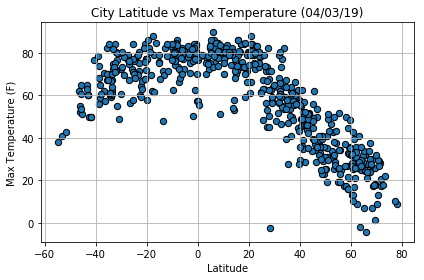

In [8]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

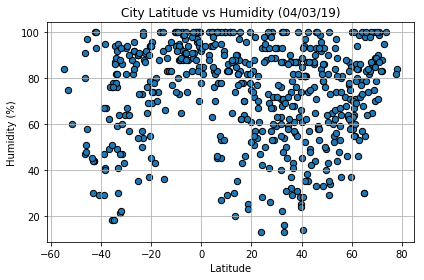

In [9]:
cities_df.plot(kind="scatter", x="Lat", y="Humidity", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Humidity (04/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

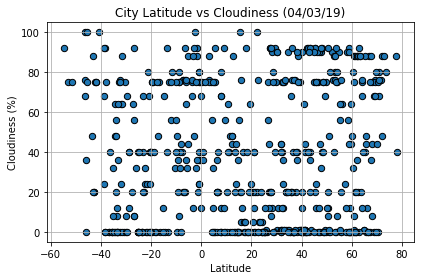

In [10]:
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

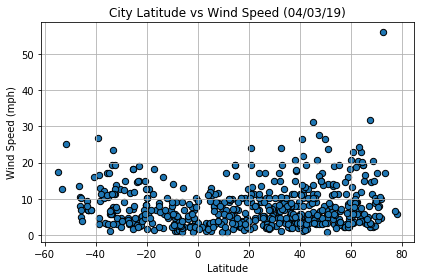

In [11]:
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/03/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()